# Customer behaviour



SVOD:
<li> Genres </li>
<li> DSD </li>
<li> Streaming hours </li>
<li> Genres </li>
<li> Frequency </li>
<li> Recency </li>
<li> Movies/TV </li>
<li> Tenure </li>
<li> Nr of distinct ASIN </li>

TVOD
<li> Genres </li>
<li> Frequency </li>
<li> Recency </li>
<li> Movies/TV </li>
<li> OPS </li>
<li> Units </li>
<li> NR/Catalog </li>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data for customers who joined after May 1 2017

In [3]:
df = pd.read_csv("../SVOD_otherGLmatrix/data/customer_tvod_behaviour.txt", sep="\t", header=None)

In [5]:
df.columns = ['unencrypted_customer_id','units','genre','ops','content_age','content_type','min_date','max_date','tenure','recency']
df['min_date'] = pd.to_datetime(df['min_date'])
df['max_date'] = pd.to_datetime(df['max_date'])
print(df.shape)
df.head()

(3236844, 10)


,unencrypted_customer_id,units,genre,ops,content_age,content_type,min_date,max_date,tenure,recency
0,17527824735,3,comedy,11.73,Deep Catalogue,Movie,2017-06-24,2018-01-01,201,10
1,1054100153,2,comedy,13.40,Deep Catalogue,Movie,2017-05-07,2017-09-29,249,104
2,1089010892,1,adventure,6.70,2_3yr_Catalogue,Movie,2017-11-05,2018-01-02,67,9
3,17777644125,5,action,20.95,New Release,Movie,2017-05-28,2017-12-12,228,30
4,931759683,1,action,4.19,Recent release,Movie,2017-10-14,2017-12-21,89,21


In [6]:
#How many unique customers
df['unencrypted_customer_id'].nunique()

1450407

## Create baseline 

In [7]:
baseline = pd.DataFrame(df.groupby("unencrypted_customer_id")[['units','ops']].sum().reset_index())

In [8]:
print(baseline.shape)
baseline.head()

(1450407, 3)


,unencrypted_customer_id,units,ops
0,821,2,5.02
1,2514,1,5.03
2,4971,5,26.00
3,19106,1,2.51
4,24585,1,10.08


## Create pivots

In [9]:
def create_pivots_age(df, columns):
    """function creates wide instead of long format, aka pivot"""
    a = pd.DataFrame(pd.pivot_table(df, values = ['units','ops'], index='unencrypted_customer_id', columns = columns).reset_index())
    a.columns = a.columns.droplevel()
    a.columns = ['unencrypted_customer_id',
               '1_2yr_Cat_OPS','2_3yr_Cat_OPS','6mo_1yr_Cat_OPS','Deep_Cat_OPS','NewRelease_OPS','RecentRelease_OPS',
              '1_2yr_Cat_units','2_3yr_Cat_units','6mo_1yr_Cat_units','Deep_Cat_units','NewRelease_units','RecentRelease_units']
    
    a = a.fillna(0)
    return a

In [10]:
age = create_pivots_age(df,'content_age')

In [11]:
print(age.shape)
age.head()

(1450407, 13)


,unencrypted_customer_id,1_2yr_Cat_OPS,2_3yr_Cat_OPS,6mo_1yr_Cat_OPS,Deep_Cat_OPS,NewRelease_OPS,RecentRelease_OPS,1_2yr_Cat_units,2_3yr_Cat_units,6mo_1yr_Cat_units,Deep_Cat_units,NewRelease_units,RecentRelease_units
0,821,0.00,0.00,0.00,0.00,4.19,0.83,0.0,0.0,0.0,0.0,1.0,1.0
1,2514,0.00,5.03,0.00,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0
2,4971,2.09,5.02,2.09,0.00,16.80,0.00,1.0,2.0,1.0,0.0,1.0,0.0
3,19106,0.00,0.00,0.00,2.51,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0
4,24585,0.00,0.00,0.00,10.08,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
def create_pivots_content(df):
    a = pd.DataFrame(df.groupby(['unencrypted_customer_id','content_type'])[['units','ops']].sum().reset_index())
    b = pd.DataFrame(pd.pivot_table(a,
    index = 'unencrypted_customer_id', columns = 'content_type', values = ['units','ops']).reset_index())
    b.columns = b.columns.droplevel()
    b.columns = ['unencrypted_customer_id','Movie_OPS','TV_Episode_OPS','TV_Season_OPS',
                 'Movie_units','TV_Episode_units','TV_Season_units']
    b = b.fillna(0)
    return b

In [13]:
content_type = create_pivots_content(df)

In [14]:
content_type.head()

,unencrypted_customer_id,Movie_OPS,TV_Episode_OPS,TV_Season_OPS,Movie_units,TV_Episode_units,TV_Season_units
0,821,5.02,0.0,0.0,2.0,0.0,0.0
1,2514,5.03,0.0,0.0,1.0,0.0,0.0
2,4971,0.00,9.2,16.8,0.0,4.0,1.0
3,19106,2.51,0.0,0.0,1.0,0.0,0.0
4,24585,10.08,0.0,0.0,1.0,0.0,0.0


In [15]:
mind = pd.DataFrame(df.groupby("unencrypted_customer_id")['min_date'].min().reset_index())
maxd = pd.DataFrame(df.groupby("unencrypted_customer_id")['max_date'].max().reset_index())

In [16]:
genre = pd.DataFrame(df.groupby("unencrypted_customer_id")['genre'].first().reset_index())

# Merging 

In [17]:
baseline = pd.merge(left=baseline,right=age,left_on='unencrypted_customer_id',right_on='unencrypted_customer_id', how='left')
baseline = pd.merge(left=baseline,right=content_type,left_on='unencrypted_customer_id',right_on='unencrypted_customer_id', how='left')
baseline = pd.merge(left=baseline,right=genre,left_on='unencrypted_customer_id',right_on='unencrypted_customer_id', how='left')
baseline = pd.merge(left=baseline,right=mind,left_on='unencrypted_customer_id',right_on='unencrypted_customer_id', how='left')
baseline = pd.merge(left=baseline,right=maxd,left_on='unencrypted_customer_id',right_on='unencrypted_customer_id', how='left')

In [18]:
print(baseline.shape)
baseline.head()

(1450407, 24)


,unencrypted_customer_id,units,ops,1_2yr_Cat_OPS,2_3yr_Cat_OPS,6mo_1yr_Cat_OPS,Deep_Cat_OPS,NewRelease_OPS,RecentRelease_OPS,1_2yr_Cat_units,...,RecentRelease_units,Movie_OPS,TV_Episode_OPS,TV_Season_OPS,Movie_units,TV_Episode_units,TV_Season_units,genre,min_date,max_date
0,821,2,5.02,0.00,0.00,0.00,0.00,4.19,0.83,0.0,...,1.0,5.02,0.0,0.0,2.0,0.0,0.0,NaN,2017-05-27,2017-08-26
1,2514,1,5.03,0.00,5.03,0.00,0.00,0.00,0.00,0.0,...,0.0,5.03,0.0,0.0,1.0,0.0,0.0,adventure,2018-01-06,2018-01-06
2,4971,5,26.00,2.09,5.02,2.09,0.00,16.80,0.00,1.0,...,0.0,0.00,9.2,16.8,0.0,4.0,1.0,adventure,2017-05-21,2017-07-26
3,19106,1,2.51,0.00,0.00,0.00,2.51,0.00,0.00,0.0,...,0.0,2.51,0.0,0.0,1.0,0.0,0.0,NaN,2017-11-12,2017-11-12
4,24585,1,10.08,0.00,0.00,0.00,10.08,0.00,0.00,0.0,...,0.0,10.08,0.0,0.0,1.0,0.0,0.0,adventure,2018-01-09,2018-01-09


In [19]:
baseline['tenure'] = (pd.to_datetime('today') - baseline['min_date'])/np.timedelta64(1,'D')
baseline['recency'] = (pd.to_datetime('today') - baseline['max_date'])/np.timedelta64(1,'D')
baseline['frequency'] = ( (baseline['max_date'] - baseline['min_date']) / (baseline['units']-1) ) / np.timedelta64(1,'D')
baseline['frequency'] = baseline['frequency'].fillna(0)

# Get target value

In [20]:
target = pd.read_csv("../SVOD_otherGLmatrix/data/target_values.txt", sep="\t",header = None)

In [21]:
target.columns = ['week_num','unencrypted_customer_id','group','svod_group']
print(target.shape)
target.head()

(4630478, 4)


,week_num,unencrypted_customer_id,group,svod_group
0,1801,587676452,Active,Sustain
1,1801,782785672,Active,Sustain
2,1801,9085708425,Active,Sustain
3,1801,656350672,Active,Sustain
4,1801,440751253,Active,Sustain


In [22]:
target = pd.DataFrame(target.groupby("unencrypted_customer_id")['group'].first().reset_index())

In [23]:
print(target.shape)
target.head()

(1883237, 2)


,unencrypted_customer_id,group
0,821,Vulnerable
1,2514,New
2,4971,Vulnerable
3,9776,Vulnerable
4,19106,New


In [24]:
baseline = baseline = pd.merge(left=baseline,right=target,left_on='unencrypted_customer_id',right_on='unencrypted_customer_id', how='left')

In [25]:
print(baseline.shape)
baseline.head()

(1450407, 28)


,unencrypted_customer_id,units,ops,1_2yr_Cat_OPS,2_3yr_Cat_OPS,6mo_1yr_Cat_OPS,Deep_Cat_OPS,NewRelease_OPS,RecentRelease_OPS,1_2yr_Cat_units,...,Movie_units,TV_Episode_units,TV_Season_units,genre,min_date,max_date,tenure,recency,frequency,group
0,821,2,5.02,0.00,0.00,0.00,0.00,4.19,0.83,0.0,...,2.0,0.0,0.0,NaN,2017-05-27,2017-08-26,230.0,139.0,91.0,Vulnerable
1,2514,1,5.03,0.00,5.03,0.00,0.00,0.00,0.00,0.0,...,1.0,0.0,0.0,adventure,2018-01-06,2018-01-06,6.0,6.0,0.0,New
2,4971,5,26.00,2.09,5.02,2.09,0.00,16.80,0.00,1.0,...,0.0,4.0,1.0,adventure,2017-05-21,2017-07-26,236.0,170.0,16.5,Vulnerable
3,19106,1,2.51,0.00,0.00,0.00,2.51,0.00,0.00,0.0,...,1.0,0.0,0.0,NaN,2017-11-12,2017-11-12,61.0,61.0,0.0,New
4,24585,1,10.08,0.00,0.00,0.00,10.08,0.00,0.00,0.0,...,1.0,0.0,0.0,adventure,2018-01-09,2018-01-09,3.0,3.0,0.0,opportunity


In [26]:
baseline.groupby("group").size()

group
Active         155199
Engage         174645
New            611114
Reactivated     15955
Vulnerable     470971
opportunity     10155
dtype: int64

In [27]:
# Make group encoded and delete min and max dates
base = baseline.drop(['min_date', 'max_date'], axis = 1)
base['genre'] = base['genre'].replace(np.nan, '', regex=True)
base.head()

,unencrypted_customer_id,units,ops,1_2yr_Cat_OPS,2_3yr_Cat_OPS,6mo_1yr_Cat_OPS,Deep_Cat_OPS,NewRelease_OPS,RecentRelease_OPS,1_2yr_Cat_units,...,TV_Episode_OPS,TV_Season_OPS,Movie_units,TV_Episode_units,TV_Season_units,genre,tenure,recency,frequency,group
0,821,2,5.02,0.00,0.00,0.00,0.00,4.19,0.83,0.0,...,0.0,0.0,2.0,0.0,0.0,,230.0,139.0,91.0,Vulnerable
1,2514,1,5.03,0.00,5.03,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,adventure,6.0,6.0,0.0,New
2,4971,5,26.00,2.09,5.02,2.09,0.00,16.80,0.00,1.0,...,9.2,16.8,0.0,4.0,1.0,adventure,236.0,170.0,16.5,Vulnerable
3,19106,1,2.51,0.00,0.00,0.00,2.51,0.00,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,,61.0,61.0,0.0,New
4,24585,1,10.08,0.00,0.00,0.00,10.08,0.00,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,adventure,3.0,3.0,0.0,opportunity


In [28]:
base['group'] = np.where(base['group'] == "Engage",1,0)
base.head()

,unencrypted_customer_id,units,ops,1_2yr_Cat_OPS,2_3yr_Cat_OPS,6mo_1yr_Cat_OPS,Deep_Cat_OPS,NewRelease_OPS,RecentRelease_OPS,1_2yr_Cat_units,...,TV_Episode_OPS,TV_Season_OPS,Movie_units,TV_Episode_units,TV_Season_units,genre,tenure,recency,frequency,group
0,821,2,5.02,0.00,0.00,0.00,0.00,4.19,0.83,0.0,...,0.0,0.0,2.0,0.0,0.0,,230.0,139.0,91.0,0
1,2514,1,5.03,0.00,5.03,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,adventure,6.0,6.0,0.0,0
2,4971,5,26.00,2.09,5.02,2.09,0.00,16.80,0.00,1.0,...,9.2,16.8,0.0,4.0,1.0,adventure,236.0,170.0,16.5,0
3,19106,1,2.51,0.00,0.00,0.00,2.51,0.00,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,,61.0,61.0,0.0,0
4,24585,1,10.08,0.00,0.00,0.00,10.08,0.00,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,adventure,3.0,3.0,0.0,0


In [29]:
base.columns

Index(['unencrypted_customer_id', 'units', 'ops', '1_2yr_Cat_OPS',
       '2_3yr_Cat_OPS', '6mo_1yr_Cat_OPS', 'Deep_Cat_OPS', 'NewRelease_OPS',
       'RecentRelease_OPS', '1_2yr_Cat_units', '2_3yr_Cat_units',
       '6mo_1yr_Cat_units', 'Deep_Cat_units', 'NewRelease_units',
       'RecentRelease_units', 'Movie_OPS', 'TV_Episode_OPS', 'TV_Season_OPS',
       'Movie_units', 'TV_Episode_units', 'TV_Season_units', 'genre', 'tenure',
       'recency', 'frequency', 'group'],
      dtype='object')

In [30]:
print(base.shape)
print(base['unencrypted_customer_id'].nunique())

(1450407, 26)
1450407


In [31]:
base = pd.get_dummies(base, columns=["genre"])
print(base.shape)
base.head()

(1450407, 53)


,unencrypted_customer_id,units,ops,1_2yr_Cat_OPS,2_3yr_Cat_OPS,6mo_1yr_Cat_OPS,Deep_Cat_OPS,NewRelease_OPS,RecentRelease_OPS,1_2yr_Cat_units,...,genre_mystery,genre_reality_tv,genre_romance,genre_sci_fi,genre_short,genre_sport,genre_talk_show,genre_thriller,genre_war,genre_western
0,821,2,5.02,0.00,0.00,0.00,0.00,4.19,0.83,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2514,1,5.03,0.00,5.03,0.00,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4971,5,26.00,2.09,5.02,2.09,0.00,16.80,0.00,1.0,...,0,0,0,0,0,0,0,0,0,0
3,19106,1,2.51,0.00,0.00,0.00,2.51,0.00,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
4,24585,1,10.08,0.00,0.00,0.00,10.08,0.00,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0


# Build a model

In [32]:
X = base.loc[:,['units', 'ops', '1_2yr_Cat_OPS',
       '2_3yr_Cat_OPS', '6mo_1yr_Cat_OPS', 'Deep_Cat_OPS', 'NewRelease_OPS',
       'RecentRelease_OPS', '1_2yr_Cat_units', '2_3yr_Cat_units',
       '6mo_1yr_Cat_units', 'Deep_Cat_units', 'NewRelease_units',
       'RecentRelease_units', 'Movie_OPS', 'TV_Episode_OPS', 'TV_Season_OPS',
       'Movie_units', 'TV_Episode_units', 'TV_Season_units', 'tenure',
       'recency', 'frequency', 'genre_', 'genre_action',
       'genre_adult', 'genre_adventure', 'genre_animation', 'genre_biography',
       'genre_comedy', 'genre_crime', 'genre_documentary', 'genre_drama',
       'genre_family', 'genre_fantasy', 'genre_film_noir', 'genre_game_show',
       'genre_history', 'genre_horror', 'genre_music', 'genre_musical',
       'genre_mystery', 'genre_reality_tv', 'genre_romance', 'genre_sci_fi',
       'genre_short', 'genre_sport', 'genre_talk_show', 'genre_thriller',
       'genre_war', 'genre_western']]
Y = base.loc[:,['group']]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [34]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1015284, 51) (435123, 51) (1015284, 1) (435123, 1)


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5, criterion='entropy',
                                   random_state = 0)

In [36]:
clf.fit(X_train,Y_train)

C:\Users\dfadeeff\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [37]:
Y_pred = clf.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

In [67]:
accuracy_score(Y_test, Y_pred)

0.95051743989630522

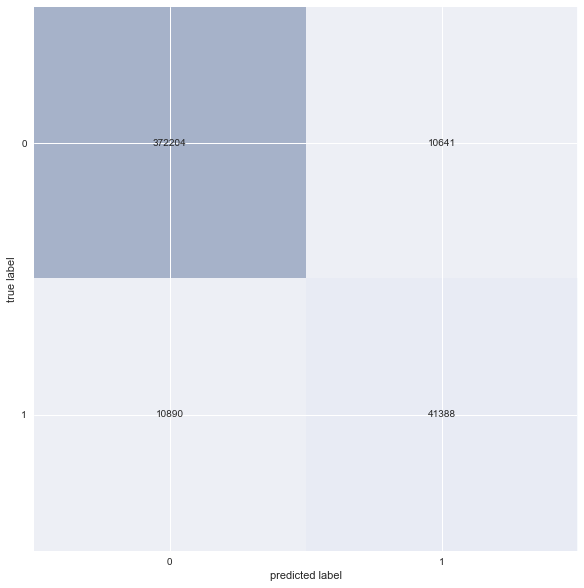

In [66]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize = (10,10))
plt.show()

In [68]:
clf.feature_importances_

array([  8.38503448e-02,   3.65408166e-02,   1.38810979e-02,
         1.30989092e-02,   1.00015772e-02,   1.63603808e-02,
         1.23596063e-02,   1.83427554e-02,   8.09984135e-03,
         7.12441449e-03,   4.41619161e-03,   1.10218670e-02,
         7.58964868e-03,   1.18978867e-02,   2.34062014e-02,
         9.08033872e-03,   1.41993209e-02,   8.30865167e-02,
         5.81918671e-03,   4.89808040e-03,   1.71506872e-01,
         1.88406072e-01,   2.25577640e-01,   1.95835940e-03,
         3.79001197e-03,   6.27393812e-07,   2.55176036e-03,
         1.02539456e-03,   1.11321066e-03,   3.15492520e-03,
         1.09528138e-03,   3.93117865e-04,   2.24190846e-03,
         3.38957680e-04,   6.38778721e-05,   2.22207056e-06,
         3.05071309e-06,   6.76817334e-06,   1.14630245e-03,
         2.45206777e-06,   2.13937262e-05,   1.93287605e-04,
         1.36267542e-05,   4.35377026e-05,   1.68889104e-04,
         1.02352007e-06,   1.35148920e-05,   0.00000000e+00,
         3.64147776e-05,

In [69]:
l = list(zip(X_train.columns, clf.feature_importances_))

In [70]:
l

[('units', 0.083850344775205615),
 ('ops', 0.036540816567580452),
 ('1_2yr_Cat_OPS', 0.01388109793710994),
 ('2_3yr_Cat_OPS', 0.013098909224146856),
 ('6mo_1yr_Cat_OPS', 0.010001577151965117),
 ('Deep_Cat_OPS', 0.016360380818208536),
 ('NewRelease_OPS', 0.012359606341799504),
 ('RecentRelease_OPS', 0.018342755357739677),
 ('1_2yr_Cat_units', 0.0080998413495307134),
 ('2_3yr_Cat_units', 0.0071244144884913844),
 ('6mo_1yr_Cat_units', 0.0044161916057342153),
 ('Deep_Cat_units', 0.011021867001562548),
 ('NewRelease_units', 0.0075896486808530086),
 ('RecentRelease_units', 0.011897886717476042),
 ('Movie_OPS', 0.023406201404017109),
 ('TV_Episode_OPS', 0.0090803387210985683),
 ('TV_Season_OPS', 0.014199320851024547),
 ('Movie_units', 0.083086516745826677),
 ('TV_Episode_units', 0.0058191867115345427),
 ('TV_Season_units', 0.0048980804037797405),
 ('tenure', 0.17150687180589586),
 ('recency', 0.18840607174240143),
 ('frequency', 0.22557763970947656),
 ('genre_', 0.0019583594012815972),
 ('gen

In [71]:
p = pd.DataFrame(np.array(l).reshape(len(l),2))
p.columns = ['feature','score']
p.dtypes

feature    object
score      object
dtype: object

In [73]:
p['score'] = pd.to_numeric(p['score'], errors='coerce')
p.sort_values(by = 'score', ascending=False)[0:10]

,feature,score
22,frequency,0.225578
21,recency,0.188406
20,tenure,0.171507
0,units,0.083850
17,Movie_units,0.083087
1,ops,0.036541
14,Movie_OPS,0.023406
7,RecentRelease_OPS,0.018343
5,Deep_Cat_OPS,0.016360
16,TV_Season_OPS,0.014199


# Visualize the random forest 

In [ ]:
from sklearn import tree
i_tree = 0
for tree_in_forest in clf.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file,feature_names=X.columns)
    i_tree = i_tree + 1